# BWAI Hackathon Nov 2021
# Team Representative: Nitin Malik, Gurgaon, India
# Team Members: Nayonika Chakraborty, Meghana Kota, Anand Mayangankar

## Problem Statement:  Not everyone is interested in 9-5 job. Those who have entrepreneurship mindset would like to start up their own companies and be their own boss. But majority of them are skeptical to take first step as they are not confident of their competencies and skills.

## Existing Alternatives: Try to be an entrepreneur, if succeed it's good, otherwise do regular job

## Proposed Solution: Using Machine Learning classifiers to predict the entrepreneurial competency in University students

In [ ]:
## Key metrics: Accuracy since classes are largely balanced

In [ ]:
## Target Customer: University students

In [ ]:
## Customer Pain: Not able to decide whether they should pursue entrepreneurship

In [ ]:
## Customer Gain: They will be able to take a call to pursue entrepreneurship or not if they opted for our solution

In [ ]:
## Unique value Proposition: One-stop solution. Just need to fill the details about their competencies

In [ ]:
## Revenue Model: Charging for the services and the detailed feedback offered to the customers

In [ ]:
# Data collected from 198 Indian university students in 2019 by Utkarsh Sharma and Naman Manchanda. 
# Data Source: https://ieeexplore.ieee.org/abstract/document/9058292

### Meta Data
EducationSector - Engineering background or not
IndividualProject - If the student builds personal project
Age - Age of student
Gender - Sex of student
City - If the student stays in a city
Influenced - If the student is influenced by someone
Perseverance - Rating of a student based upon perseverance
DesireToTakeInitiative - Rating of a student based upon desire to take initiative - Competitiveness
Competitive rating - SelfRelianceSelf reliance rating
SelfReliance - Self reliance rating
StrongNeedToAchieve - Strong need to achieve a goal rating
SelfConfidence - Self confidence rating
GoodPhysicalHealth - Good physical health rating
MentalDisorder - If there is any mental disorder
KeyTraits - Key traits of the student
ReasonsForLack - Reason for lack of entrepreneurship culture
y - Whether the student seems to become a entrepreneur or not

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df=pd.read_csv('data.csv')
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


## EDA

In [60]:
df.shape

(219, 17)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    object
 1   IndividualProject       219 non-null    object
 2   Age                     219 non-null    int64 
 3   Gender                  219 non-null    object
 4   City                    219 non-null    object
 5   Influenced              219 non-null    object
 6   Perseverance            219 non-null    int64 
 7   DesireToTakeInitiative  219 non-null    int64 
 8   Competitiveness         219 non-null    int64 
 9   SelfReliance            219 non-null    int64 
 10  StrongNeedToAchieve     219 non-null    int64 
 11  SelfConfidence          219 non-null    int64 
 12  GoodPhysicalHealth      219 non-null    int64 
 13  MentalDisorder          219 non-null    object
 14  KeyTraits               219 non-null    object
 15  Reason

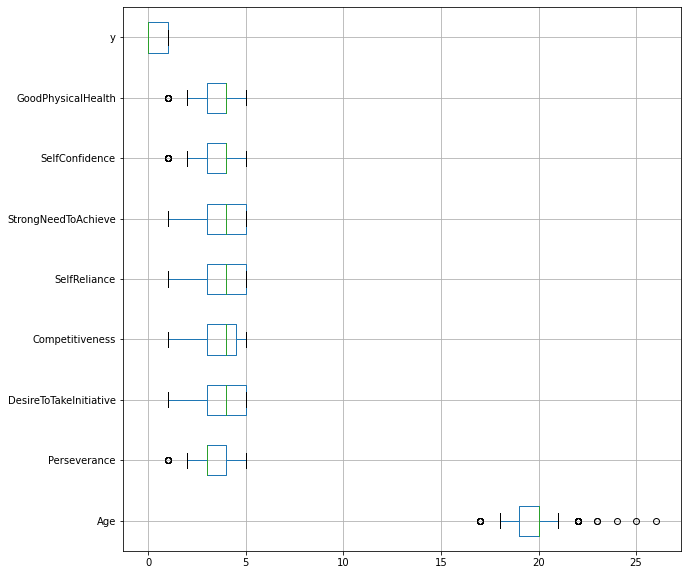

In [62]:
# checking for outliers
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

In [63]:
# unique values for categorical variables
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

EDUCATIONSECTOR :  9
Language and Cultural Studies                              1
Teaching Degree (e.g., B.Ed)                               3
Mathematics or Natural Sciences                            4
Humanities and Social Sciences                             5
Medicine, Health Sciences                                 10
Others                                                    20
Art, Music or Design                                      21
Economic Sciences, Business Studies, Commerce and Law     32
Engineering Sciences                                     123
Name: EducationSector, dtype: int64


INDIVIDUALPROJECT :  2
No      95
Yes    124
Name: IndividualProject, dtype: int64


AGE :  10
24     1
25     1
26     1
23     2
17     7
22    12
18    18
21    28
19    70
20    79
Name: Age, dtype: int64


GENDER :  2
Female     57
Male      162
Name: Gender, dtype: int64


CITY :  2
No      36
Yes    183
Name: City, dtype: int64


INFLUENCED :  2
No      61
Yes    158
Name: Influence

## Data Preprocessing

In [67]:
# fill the missing value in ReasonsForLack column as No Reason
df['ReasonsForLack'] = df['ReasonsForLack'].fillna('No Reason')

In [68]:
df.isnull().sum().sum()

0

In [69]:
df['ReasonsForLack'] = df['ReasonsForLack'].str.replace('Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else)',
                                 'Just not interested, ',regex=False)

In [70]:
df['ReasonsForLack'].str.split(', ', expand=True)[0].unique()

array(['No Reason', 'Just not interested',
       'Not willing to start a venture in India and waiting for future relocation',
       'Not able to take a Financial Risk', 'Academic Pressure',
       'Lack of Knowledge', 'Unwillingness to take risk',
       'Parental Pressure', 'Mental Block'], dtype=object)

In [71]:
df['No Reason'] = df['ReasonsForLack'].str.contains('No Reason')
df['Just not interested'] = df['ReasonsForLack'].str.contains('Just not interested')
df['Future relocation'] = df['ReasonsForLack'].str.contains('waiting for future relocation')
df['Financial Risk'] = df['ReasonsForLack'].str.contains('Not able to take a Financial Risk')
df['Academic Pressure'] = df['ReasonsForLack'].str.contains('Academic Pressure')
df['Lack of Knowledge'] = df['ReasonsForLack'].str.contains('Lack of Knowledge')
df['Unwillingness to take risk'] = df['ReasonsForLack'].str.contains('Unwillingness to take risk')
df['Parental Pressure'] = df['ReasonsForLack'].str.contains('Parental Pressure')
df['Mental Block'] = df['ReasonsForLack'].str.contains('Mental Block')
# 9 cols with boolean values added

In [72]:
df = df.drop('ReasonsForLack', axis=1)
# 1 col dropped

In [73]:
df.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,y,No Reason,Just not interested,Future relocation,Financial Risk,Academic Pressure,Lack of Knowledge,Unwillingness to take risk,Parental Pressure,Mental Block
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,...,1,True,False,False,False,False,False,False,False,False
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,...,0,False,True,False,False,False,False,False,False,False
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,...,0,False,False,True,False,False,False,False,False,False
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,...,0,False,False,False,True,False,False,False,False,False
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,...,1,True,False,False,False,False,False,False,False,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EducationSector             219 non-null    object
 1   IndividualProject           219 non-null    object
 2   Age                         219 non-null    int64 
 3   Gender                      219 non-null    object
 4   City                        219 non-null    object
 5   Influenced                  219 non-null    object
 6   Perseverance                219 non-null    int64 
 7   DesireToTakeInitiative      219 non-null    int64 
 8   Competitiveness             219 non-null    int64 
 9   SelfReliance                219 non-null    int64 
 10  StrongNeedToAchieve         219 non-null    int64 
 11  SelfConfidence              219 non-null    int64 
 12  GoodPhysicalHealth          219 non-null    int64 
 13  MentalDisorder              219 non-null    object

In [30]:
# checking for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [31]:
df.describe()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,y
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,19.753425,3.351598,3.621005,3.589041,3.721461,3.908676,3.575342,3.561644,0.415525
std,1.289842,0.995234,1.152467,1.110859,1.053629,1.023068,1.120098,1.100287,0.493941
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,19.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,20.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,20.000000,4.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,1.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [32]:
# comparing males and females
df.groupby([df.EducationSector,df.Gender]).count()

IndividualProject  \
EducationSector                                    Gender                      
Art, Music or Design                               Female                  8   
                                                   Male                   13   
Economic Sciences, Business Studies, Commerce a... Female                  9   
                                                   Male                   23   
Engineering Sciences                               Female                 23   
                                                   Male                  100   
Humanities and Social Sciences                     Female                  2   
                                                   Male                    3   
Language and Cultural Studies                      Male                    1   
Mathematics or Natural Sciences                    Female                  1   
                                                   Male                    3   
Medicine, Health Sciences                          Female                  5   
                                                   Male                    5   
Others                                             Female                  9   
                                                   Male                   11   
Teaching Degree (e.g., B.Ed)                       Male                    3   

                                                           Age  City  \
EducationSector                                    Gender              
Art, Music or Design                               Female    8     8   
                                                   Male     13    13   
Economic Sciences, Business Studies, Commerce a... Female    9     9   
                                                   Male     23    23   
Engineering Sciences                               Female   23    23   
                                                   Male    100   100   
Humanities and Social Sciences                     Female    2     2   
                                                   Male      3     3   
Language and Cultural Studies                      Male      1     1   
Mathematics or Natural Sciences                    Female    1     1   
                                                   Male      3     3   
Medicine, Health Sciences                          Female    5     5   
                                                   Male      5     5   
Others                                             Female    9     9   
                                                   Male     11    11   
Teaching Degree (e.g., B.Ed)                       Male      3     3   

                                                           Influenced  \
EducationSector                                    Gender               
Art, Music or Design                               Female           8   
                                                   Male            13   
Economic Sciences, Business Studies, Commerce a... Female           9   
                                                   Male            23   
Engineering Sciences                               Female          23   
                                                   Male           100   
Humanities and Social Sciences                     Female           2   
                                                   Male             3   
Language and Cultural Studies                      Male             1   
Mathematics or Natural Sciences                    Female           1   
                                                   Male             3   
Medicine, Health Sciences                          Female           5   
                                                   Male             5   
Others                                             Female           9   
                                                   Male            11   
Teaching Degree (e.g., B.Ed)                       Male             3   

      

In [33]:
df.shape

(219, 25)

In [34]:
df['y'].value_counts(normalize=True)
# classes are largely balanced, accuracy metric is sufficient

0    0.584475
1    0.415525
Name: y, dtype: float64

## Segreggating X and y

In [35]:
X = df.drop('y', axis=1)
y = df['y']
X.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,...,KeyTraits,No Reason,Just not interested,Future relocation,Financial Risk,Academic Pressure,Lack of Knowledge,Unwillingness to take risk,Parental Pressure,Mental Block
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,...,Passion,True,False,False,False,False,False,False,False,False
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,...,Vision,False,True,False,False,False,False,False,False,False
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,...,Passion,False,False,True,False,False,False,False,False,False
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,...,Resilience,False,False,False,True,False,False,False,False,False
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,...,Vision,True,False,False,False,False,False,False,False,False


## Encoding categorical data

In [36]:
# categorical data is nominal, so converting categorical to numerical using One Hot Encoding
X = pd.get_dummies(X)
# 25 cols increased to 41

In [37]:
X.head()

,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,No Reason,Just not interested,...,City_Yes,Influenced_No,Influenced_Yes,MentalDisorder_No,MentalDisorder_Yes,KeyTraits_Passion,KeyTraits_Positivity,KeyTraits_Resilience,KeyTraits_Vision,KeyTraits_Work Ethic
0,19,2,2,3,3,2,2,3,True,False,...,1,1,0,0,1,1,0,0,0,0
1,22,3,3,3,4,4,3,4,False,True,...,0,0,1,0,1,0,0,0,1,0
2,18,3,4,3,3,3,4,4,False,False,...,1,1,0,1,0,1,0,0,0,0
3,20,3,3,3,3,4,3,3,False,False,...,1,0,1,1,0,0,0,1,0,0
4,19,2,3,3,3,4,3,2,True,False,...,1,0,1,0,1,0,0,0,1,0


## Train Test Split

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score as cvs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

In [13]:
X_train.shape
X_test.shape

(66, 41)

## Satandardisation

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model 1: SVC

In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC(kernel = 'sigmoid') # kernel=‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ # default=’rbf’

In [35]:
model.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [43]:
# accuracy on validation data # 10-fold CV
cv_accuracy = cvs(model,X_test,y_test,cv=10,scoring='accuracy')
print(cv_accuracy)
cv_accuracy.mean()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


1.0

In [36]:
# accuracy on test data
test_accuracy = model.score(X_test,y_test)
test_accuracy

1.0

### Predictions and Evaluations

Now let's predict using the trained model.

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

1.0

In [45]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [46]:
print(confusion_matrix(y_test,y_pred))

[[36  0]
 [ 0 30]]


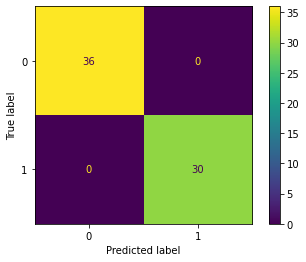

In [47]:
plot_confusion_matrix(model,X_test,y_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        30

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



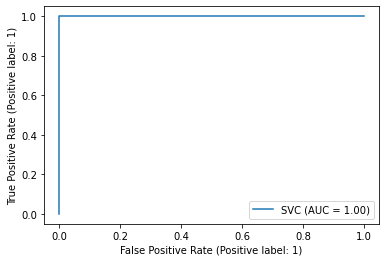

In [53]:
plot_roc_curve(model,X_test,y_test)

### hyperparamter optimization

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} #dictionary, C, gamma & kernel are hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV #gridsearchcv is a meta estimator

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3) #verbosity level of 3 # it could be 2

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [ ]:
# May take awhile!
grid.fit(X_train,y_train)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

Then you can re-run predictions on this grid object just like you would with a normal model.

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

In [ ]:
print(classification_report(y_test,grid_predictions))

## Model 2: XGBoost

In [19]:
#pip install xgboost
# already installed

Note: you may need to restart the kernel to use updated packages.


In [17]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(objective='binary:logistic',eval_metric=['logloss'], use_label_encoder=False)
#model = XGBClassifier()
XGB_model.fit(X_train, y_train)
pred = XGB_model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

## Model 3: Gaussian NB

In [21]:
from sklearn.naive_bayes import GaussianNB as GNB
nb = GNB()
nb_model = nb.fit(X_train,y_train)
proba = nb_model.predict_proba(X_test)
y_pred = nb_model.predict(X_test)

cvs(nb_model,X_test,y_test,cv=10).mean()

1.0

In [25]:
from sklearn.metrics import accuracy_score
model_score = nb.score(X_train, y_train)                      ## Accuracy
print(model_score)

1.0


In [26]:
nb.score(X_train, y_train)

1.0

In [31]:
#Performance Matrix on test data set
from sklearn.metrics import accuracy_score
y_test_predict = nb.predict(X_test)
model_score = nb.score(X_test, y_test)                           ## Accuracy
print(model_score)

1.0


In [33]:
nb.score(X_test, y_test)

1.0

## Model 4: KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [42]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8954248366013072
[[74 15]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90        89
           1       0.81      0.98      0.89        64

    accuracy                           0.90       153
   macro avg       0.90      0.91      0.89       153
weighted avg       0.91      0.90      0.90       153



In [43]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8484848484848485
[[29 10]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        39
           1       0.73      1.00      0.84        27

    accuracy                           0.85        66
   macro avg       0.86      0.87      0.85        66
weighted avg       0.89      0.85      0.85        66



In [44]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [45]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8823529411764706
[[72 17]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89        89
           1       0.79      0.98      0.87        64

    accuracy                           0.88       153
   macro avg       0.89      0.90      0.88       153
weighted avg       0.90      0.88      0.88       153



In [46]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7878787878787878
[[25 14]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        39
           1       0.66      1.00      0.79        27

    accuracy                           0.79        66
   macro avg       0.83      0.82      0.79        66
weighted avg       0.86      0.79      0.79        66



In [47]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.19696969696969702,
 0.16666666666666663,
 0.1515151515151515,
 0.21212121212121215,
 0.21212121212121215,
 0.2272727272727273,
 0.25757575757575757,
 0.25757575757575757,
 0.2727272727272727,
 0.28787878787878785]

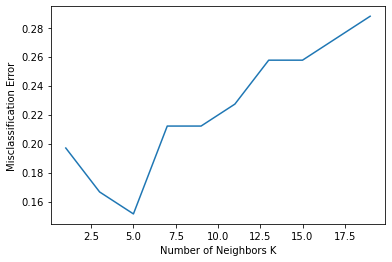

In [48]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 3 it is giving the best test accuracy lets check train and test for K=3 with other evaluation metrics

In [49]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8954248366013072
[[75 14]
 [ 2 62]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        89
           1       0.82      0.97      0.89        64

    accuracy                           0.90       153
   macro avg       0.89      0.91      0.89       153
weighted avg       0.91      0.90      0.90       153



In [51]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8333333333333334
[[29 10]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        39
           1       0.72      0.96      0.83        27

    accuracy                           0.83        66
   macro avg       0.84      0.85      0.83        66
weighted avg       0.87      0.83      0.83        66



In [52]:
0.745-0.575

0.17000000000000004

In [ ]:
## As the difference between train and test accuracies is 17 % which is more than 10%(Industry standard).So, we will look for the next best value of K. which is K=7

In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8823529411764706
[[72 17]
 [ 1 63]]
              precision    recall  f1-score   support

           0       0.99      0.81      0.89        89
           1       0.79      0.98      0.87        64

    accuracy                           0.88       153
   macro avg       0.89      0.90      0.88       153
weighted avg       0.90      0.88      0.88       153



In [55]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7878787878787878
[[25 14]
 [ 0 27]]
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        39
           1       0.66      1.00      0.79        27

    accuracy                           0.79        66
   macro avg       0.83      0.82      0.79        66
weighted avg       0.86      0.79      0.79        66



In [57]:
0.882-0.787 

0.09499999999999997

In [ ]:
# As the difference between train and test accuracies is less than 10%, there is no overfitting

## Conclusion: 
## SVC: Accuracy: 100%
## XGBoost: Accuracy: 100%
## Gaussian NB: Accuracy: 100%
## KNN: Accuracy: 78.7%